<a href="https://colab.research.google.com/github/limruby/sentiment_analysis/blob/branch-1/Sentiment_Analysis_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**


*   VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. Source : https://github.com/cjhutto/vaderSentiment





In [12]:
#Install Library
!pip install vaderSentiment



*   Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
*   NLTK is a leading platform for building Python programs to work with human language data.






In [13]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **2. Import Data**

In [14]:
# Import data from Github
url = 'https://raw.githubusercontent.com/limruby/sentiment_analysis/main/data_bbc.csv'
df = pd.read_csv(url, sep=',', encoding = "ISO-8859-1")

In [4]:
df.head(5)

,ï»¿created_time,message
0,1/14/2021 10:33,I have a friend in Malaysia with a budding car...
1,1/14/2021 11:06,Henry Whelchel There are certain truth one may...
2,1/14/2021 11:50,Henry Whelchel Rubbish. He knows BBC is fake news
3,1/14/2021 12:32,you are cia?
4,1/14/2021 14:46,Henry Whelchel so weak


In [15]:
df.shape

(3923, 2)

# **3. PreProcessing**


### 1. Remove duplicate




In [16]:
# Remove duplicate row from table
df = df.drop_duplicates()
df.shape

(420, 2)

###2. RemoveURL

In [17]:
# Remove Duplicate from selected column
df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)
df.message

0       I have a friend in Malaysia with a budding car...
1       Henry Whelchel There are certain truth one may...
2       Henry Whelchel Rubbish. He knows BBC is fake news
3                                            you are cia?
4                                 Henry Whelchel so weak 
                              ...                        
2080                                         Hassan Noor 
2767    Ceasar Ua-ampon à¹à¸¡à¹à¹à¸à¸¥à¸à¹à¸à¸¥...
3153          Poor guy! He's gonna get a lot of hate now!
3512                                    Dzung Quoc Le omg
3862                                         Laurie Wade 
Name: message, Length: 420, dtype: object

###3. LowerCasing


In [18]:
# Change the message column into lowercase
df['message'] = df['message'].str.lower()
df.message

0       i have a friend in malaysia with a budding car...
1       henry whelchel there are certain truth one may...
2       henry whelchel rubbish. he knows bbc is fake news
3                                            you are cia?
4                                 henry whelchel so weak 
                              ...                        
2080                                         hassan noor 
2767    ceasar ua-ampon à¹à¸¡à¹à¹à¸à¸¥à¸à¹à¸à¸¥...
3153          poor guy! he's gonna get a lot of hate now!
3512                                    dzung quoc le omg
3862                                         laurie wade 
Name: message, Length: 420, dtype: object

###Tokenize

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#Testing
example_text = df.iloc[0]
print(nltk.word_tokenize(example_text['message']))

['i', 'have', 'a', 'friend', 'in', 'malaysia', 'with', 'a', 'budding', 'career', 'that', 'may', 'be', 'influenced', 'by', 'the', 'ccp', '.', 'i', 'understand', 'the', 'exigency', 'of', 'any', 'pro-xi/ccp', 'remarks', 'they', 'make', '.', 'i', 'will', 'excuse', 'nigel', 'ng', 'for', 'this', 'as', 'well', '.']


In [21]:
def identify_tokens(row):
    message = row['message']
    tokens = nltk.word_tokenize(message)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
    
df['message'] = df.apply(identify_tokens, axis=1)

TypeError: ignored

In [ ]:
df.message

In [22]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [23]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])

['frighten', 'frighten', 'frighten']


In [24]:
def stem_list(row):
    my_list = row['message']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [25]:
df['stemmed_words'] = df.apply(stem_list, axis=1)

TypeError: ignored

In [26]:
df.message

0       i have a friend in malaysia with a budding car...
1       henry whelchel there are certain truth one may...
2       henry whelchel rubbish. he knows bbc is fake news
3                                            you are cia?
4                                 henry whelchel so weak 
                              ...                        
2080                                         hassan noor 
2767    ceasar ua-ampon à¹à¸¡à¹à¹à¸à¸¥à¸à¹à¸à¸¥...
3153          poor guy! he's gonna get a lot of hate now!
3512                                    dzung quoc le omg
3862                                         laurie wade 
Name: message, Length: 420, dtype: object

# **4. Sentiment Analysis**

###Get Subjectivity & polarity

In [29]:
# Create a function to get subjectivity
def getSubjectivity(message):
  return TextBlob(message).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(message):
  return TextBlob(message).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df ['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)

# Display data
df

,ï»¿created_time,message,Subjectivity,Polarity
0,1/14/2021 10:33,i have a friend in malaysia with a budding car...,0.125000,0.025000
1,1/14/2021 11:06,henry whelchel there are certain truth one may...,0.285714,0.133929
2,1/14/2021 11:50,henry whelchel rubbish. he knows bbc is fake news,1.000000,-0.500000
3,1/14/2021 12:32,you are cia?,0.000000,0.000000
4,1/14/2021 14:46,henry whelchel so weak,0.625000,-0.375000
...,...,...,...,...
2080,1/14/2021 10:01,hassan noor,0.000000,0.000000
2767,1/14/2021 23:12,ceasar ua-ampon à¹à¸¡à¹à¹à¸à¸¥à¸à¹à¸à¸¥...,0.000000,0.000000
3153,1/15/2021 10:51,poor guy! he's gonna get a lot of hate now!,0.750000,-0.750000
3512,1/14/2021 10:33,dzung quoc le omg,0.000000,0.000000


In [28]:
# Change title to string
df['message'] = df['message'].astype(str)

In [30]:
# import library for text analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [31]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in df.iterrows():
  df['message']
  ss = sid.polarity_scores(row['message'])
  listy.append(ss)
  
se = pd.Series(listy)
df['sentiment'] = se.values
display(df.head(10))

,ï»¿created_time,message,Subjectivity,Polarity,sentiment
0,1/14/2021 10:33,i have a friend in malaysia with a budding car...,0.125000,0.025000,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp..."
1,1/14/2021 11:06,henry whelchel there are certain truth one may...,0.285714,0.133929,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."
2,1/14/2021 11:50,henry whelchel rubbish. he knows bbc is fake news,1.000000,-0.500000,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp..."
3,1/14/2021 12:32,you are cia?,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1/14/2021 14:46,henry whelchel so weak,0.625000,-0.375000,"{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'comp..."
5,1/14/2021 14:46,tom choi so weak,0.625000,-0.375000,"{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'comp..."
6,1/14/2021 14:47,tang chen so weak,0.625000,-0.375000,"{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'comp..."
7,1/14/2021 18:22,samnang laor so adorable,1.000000,0.500000,"{'neg': 0.0, 'neu': 0.422, 'pos': 0.578, 'comp..."
8,1/14/2021 23:16,^^^haiyaa^^^,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,1/14/2021 10:45,what people forget is that there are actually ...,0.304167,-0.224167,"{'neg': 0.143, 'neu': 0.787, 'pos': 0.069, 'co..."


###Compute Negative, Neutral and Positive Analysis

In [32]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display data
df

,ï»¿created_time,message,Subjectivity,Polarity,sentiment,Analysis
0,1/14/2021 10:33,i have a friend in malaysia with a budding car...,0.125000,0.025000,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",Positive
1,1/14/2021 11:06,henry whelchel there are certain truth one may...,0.285714,0.133929,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",Positive
2,1/14/2021 11:50,henry whelchel rubbish. he knows bbc is fake news,1.000000,-0.500000,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",Negative
3,1/14/2021 12:32,you are cia?,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,1/14/2021 14:46,henry whelchel so weak,0.625000,-0.375000,"{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'comp...",Negative
...,...,...,...,...,...,...
2080,1/14/2021 10:01,hassan noor,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2767,1/14/2021 23:12,ceasar ua-ampon à¹à¸¡à¹à¹à¸à¸¥à¸à¹à¸à¸¥...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3153,1/15/2021 10:51,poor guy! he's gonna get a lot of hate now!,0.750000,-0.750000,"{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'comp...",Negative
3512,1/14/2021 10:33,dzung quoc le omg,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


### Print Positive Comments

In [33]:
# Print all positive comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

1)i have a friend in malaysia with a budding career that may be influenced by the ccp. i understand the exigency of any pro-xi/ccp remarks they make. i will excuse nigel ng for this as well.

2)henry whelchel there are certain truth one may not understand in life ! i have been "influenced" and "brainwashed" by western values almost 40+ years ago for about 30 years ! i have already woken up, when will you ??

3)samnang laor so adorable

4)alex heron because some 50 million chinese people live outside china.

5)yeah in the us they just don't allow anyone critical into the media at all, much more effective

6)jesse mcgean this is sarcasm surely?!?  have you seen how critical american talk shows are of trump? it's literally all they've talked about for 4 years ð¤£

7)amazing isn't it

8)no it's not, it's a habit of the right wing to act like they're the one's being persecuted, something that fox news does all the time.

9)jimmy travis good, it'll be easy for you to give me some examples o

KeyError: ignored

### Print Negative Comments


In [34]:
# Print all negative comments
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

1)henry whelchel rubbish. he knows bbc is fake news

2)henry whelchel so weak 

3)tom choi so weak 

4)tang chen so weak 

5)what people forget is that there are actually agents of the cpc/communist party whose role is to follow asian celebrities and troll/express anger at any "anti-chinese"/anti-party content. they make it seem that the "chinese fans" are mad.  (yes there are a portion of chinese fans that may be die hard supporters of the party and actually get mad at political speak, i've met them, but there are a lot of state sponsored troll agents online).

6)nihao's it going? å°å³ãæç¾è­äºº yeah, heâs so weak. thatâs why auntie helen left ð

7)nihao's it going? å°å³ãæç¾è­äºº his jokes so weak n lacks flavour.... thatâs why he needs msg

8)how would chinese fans even watch the video unless they are using a vpn? which would leave them vulnerable to being arrested. and not to mention using a vpn is an act of rebellion against the ccp regime anyway. if he mean

KeyError: ignored

### Visualization

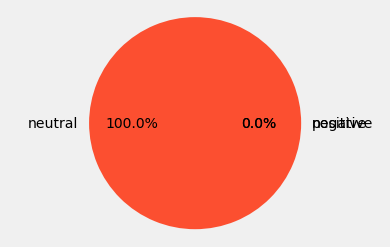

In [35]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

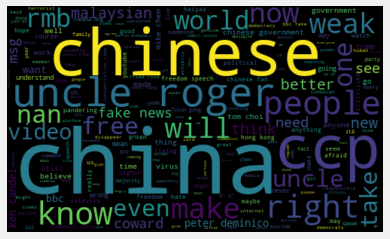

In [36]:
# plot Word Cloud
allWords = ' '.join( [message for message in df['message']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: ignored

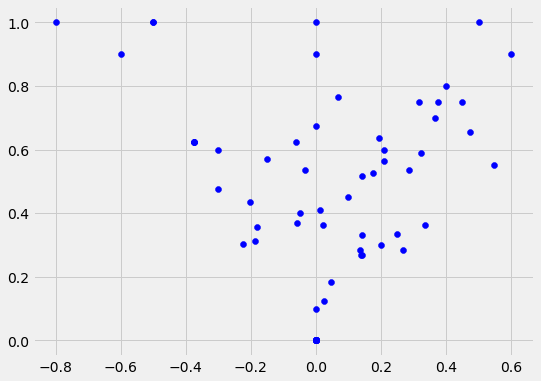

In [38]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<function matplotlib.pyplot.show>

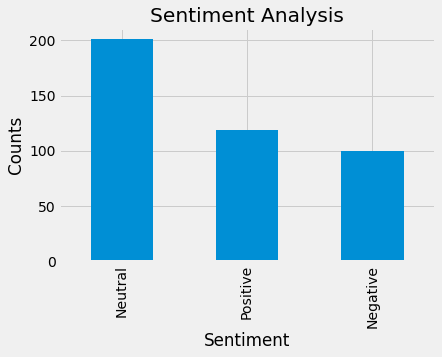

In [39]:
# Show value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

### Save to CSV

In [ ]:
df.to_csv('Output_File.csv', index=False)